In [5]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

temperatures = [] # Array for the temperatures
function_values = []
iterations = []
states = []
L_0 = 500 #initial Markov chain length
beta = 0.5 # A factor that adjusts how the Markov chain length increases with iterations, providing adaptive control as the algorithm progresses.

# Define the two-variable function
def f(x, y):
    return (x-3)**2 + (y+2)**2 + 5

def simulate(temp):
    current_x = random.uniform(-3, 4)
    current_y = random.uniform(-3, 4)
    best_solution = (current_x, current_y)
    best_value = f(current_x, current_y)
    new_x = random.uniform(-3, 4)
    new_y = random.uniform(-3, 4)
    best_x = current_x
    best_y =  current_y

    for i in range(1, 1501):
        delta_E = f(new_x, new_y) - f(current_x, current_y)

        L_i = L_0 * (1 + beta * log(1 + i))
        trails = 1
        while trails < L_i:
          if delta_E <= 0:
            current_x = new_x
            current_y = new_y
            if f(current_x, current_y) < best_value:
                best_solution = (current_x, current_y)
                best_value = f(current_x, current_y)
            new_x = random.uniform(-3, 4)
            new_y = random.uniform(-3, 4)
          elif math.exp(-delta_E / temp) > random.uniform(0, 1):
              current_x = new_x
              current_y = new_y
              if f(current_x, current_y) < best_value:
                  best_x = current_x
                  best_y =  current_y
                  best_solution = (current_x, current_y)
                  best_value = f(current_x, current_y)
              new_x = random.uniform(-3, 4)
              new_y = random.uniform(-3, 4)
        else:
            new_x = random.uniform(-3, 4)
            new_y = random.uniform(-3, 4)
        trails = trails + 1

        states.append((best_x, best_y))
        function_values.append(f(best_x, best_y))
        temperatures.append(temp)
        iterations.append(i)

        delta_T = temp*0.05 # Decrement Value

        temp = temp - delta_T

    return best_solution, best_value,states,function_values

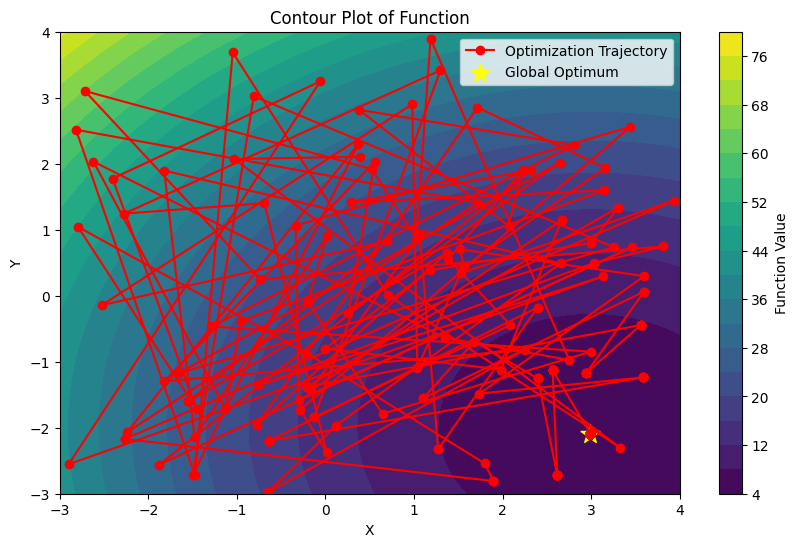

Optimal solution: (2.990995699390737, -2.090787268876074)
Function value at optimal solution: 5.008323405619438


In [4]:
# Simulate
best_solution, best_value, states, function_values = simulate(1500)

# Plot contour plot of the function
x = np.linspace(-3, 4, 100)
y = np.linspace(-3, 4, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(10, 6))
plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(label='Function Value')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of Function')

# Overlay the trajectory
x_traj = [s[0] for s in states]
y_traj = [s[1] for s in states]
plt.plot(x_traj, y_traj, marker='o', color='red', label='Optimization Trajectory')
plt.scatter(best_solution[0], best_solution[1], color='yellow', marker='*', s=200, label='Global Optimum')
plt.legend()

plt.show()

print("Optimal solution:", best_solution)
print("Function value at optimal solution:", best_value)